# 02-02: Analisi dataset Gallstone

**2. Il dataset qui a fianco proviene dall'UCI ML laboratory https://archive.ics.uci.edu/dataset/1150/gallstone-1**

Il dataset clinico è stato raccolto presso l'Ambulatorio di Medicina Interna dell'Ospedale Ankara VM Medical Park e include dati di 319 individui (giugno 2022 – giugno 2023), di cui 161 con diagnosi di calcolosi biliare. Esso contiene 38 variabili, tra cui dati demografici, di bioimpedenza e di laboratorio, ed è stato approvato eticamente dal Comitato Etico dell'Ospedale della Città di Ankara (E2-23-4632). Le variabili demografiche comprendono età, sesso, altezza, peso e BMI. I dati di bioimpedenza includono acqua totale, extracellulare e intracellulare, massa muscolare e grassa, proteine, area del grasso viscerale e grasso epatico. Le variabili di laboratorio comprendono glucosio, colesterolo totale, HDL, LDL, trigliceridi, AST, ALT, ALP, creatinina, GFR, PCR, emoglobina e vitamina D. Il dataset è completo, senza valori mancanti, ed è bilanciato rispetto alla presenza della malattia, eliminando la necessità di ulteriori fasi di pre-processing. Fornisce una solida base per la previsione della calcolosi biliare tramite modelli di machine learning basati su caratteristiche non derivanti da imaging.

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
base = pd.read_excel("inml25tst02.xlsx", sheet_name="Es 2")
df = base.drop(columns=base.columns[:9]).set_index("id").sort_index()

In [265]:
df.head(1)

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
id,,,,,,,,,,,,,,,,,,,,,
1,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0


## Correlazione tra input e output

**2.1 Siccome le variabili sono tante, vorremmo concentrarci su quelle che sono più correlate a quella di output, Gallstone Status. Calcolare la correlazione di ciascuna variabile con quella di output, ed elencare le 15 variabili più correlate.**

*Siccome non abbiamo ancora verificato la distribuzione delle variabili, è meglio usare la correlazione di Spearman, invece della solita correlazione lineare (di Pearson). Questa si ottiene calcolando la correlazione di lineare dopo aver sostituito i valori della variabile con i ranghi associati a quei valori, quindi 1 al posto del valore più piccolo, 2 al posto del secondo più piccolo, e così via.*

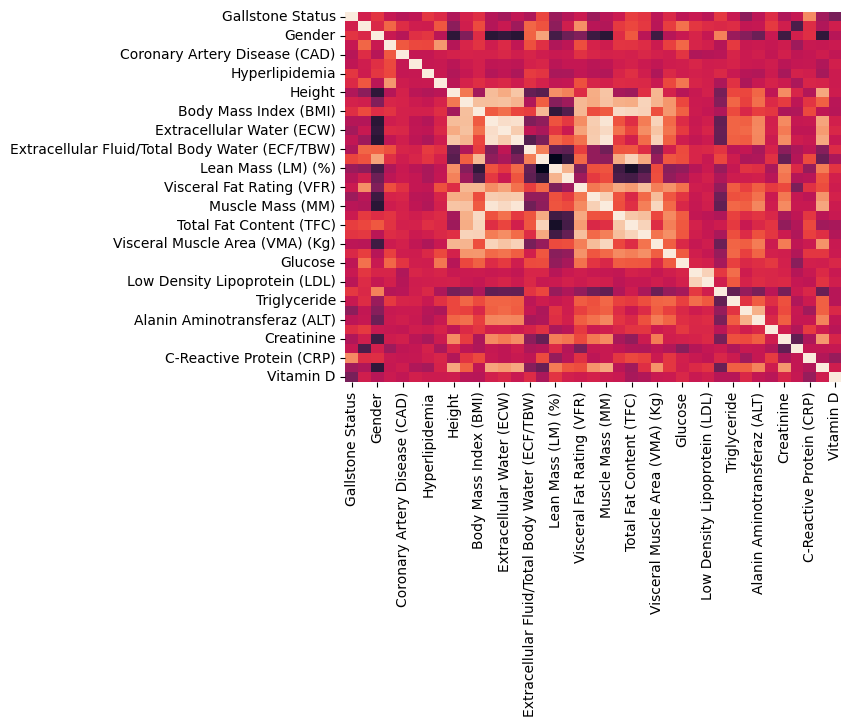

In [266]:
spearman_corr = df.corr(method="spearman")
sns.heatmap(spearman_corr, cbar=False)
plt.show()

In [267]:
k = 15
top_k_features = spearman_corr["Gallstone Status"].sort_values()[::-1][:k+1]
top_k_features

Gallstone Status                   1.000000
C-Reactive Protein (CRP)           0.520192
Total Body Fat Ratio (TBFR) (%)    0.227616
Total Fat Content (TFC)            0.192926
High Density Lipoprotein (HDL)     0.174959
Hyperlipidemia                     0.161901
Visceral Fat Area (VFA)            0.156637
Gender                             0.153483
Body Mass Index (BMI)              0.121131
Alkaline Phosphatase (ALP)         0.114235
Diabetes Mellitus (DM)             0.104689
Hepatic Fat Accumulation (HFA)     0.093444
Weight                             0.051167
Age                                0.042643
Visceral Fat Rating (VFR)         -0.000546
Obesity (%)                       -0.003132
Name: Gallstone Status, dtype: float64

In [268]:
features_list = list(top_k_features.index)
features_list

['Gallstone Status',
 'C-Reactive Protein (CRP)',
 'Total Body Fat Ratio (TBFR) (%)',
 'Total Fat Content (TFC)',
 'High Density Lipoprotein (HDL)',
 'Hyperlipidemia',
 'Visceral Fat Area (VFA)',
 'Gender',
 'Body Mass Index (BMI)',
 'Alkaline Phosphatase (ALP)',
 'Diabetes Mellitus (DM)',
 'Hepatic Fat Accumulation (HFA)',
 'Weight',
 'Age',
 'Visceral Fat Rating (VFR)',
 'Obesity (%)']

## Preprocessing

**2.2 Studiare la distribuzione delle 15 variabili trovate sopra, sia univariata, sia bivariata, alla ricerca di outliers e altri difetti. Si scelgano opportune trasformazioni per facilitare questo compito e per ottenere migliori risultati negli esercizi seguenti.**

In [269]:
X_selected = df[features_list]
X_filtered = X_selected
X_filtered.head()

,Gallstone Status,C-Reactive Protein (CRP),Total Body Fat Ratio (TBFR) (%),Total Fat Content (TFC),High Density Lipoprotein (HDL),Hyperlipidemia,Visceral Fat Area (VFA),Gender,Body Mass Index (BMI),Alkaline Phosphatase (ALP),Diabetes Mellitus (DM),Hepatic Fat Accumulation (HFA),Weight,Age,Visceral Fat Rating (VFR),Obesity (%)
id,,,,,,,,,,,,,,,,
1,0,0.0,19.2,17.8,40.0,0,10.6,0,27.1,87.0,0,0,92.8,50,9,23.4
2,0,0.0,32.8,31.0,43.0,0,18.4,0,30.5,46.0,0,0,94.5,47,15,38.8
3,0,0.0,27.3,24.9,43.0,0,16.2,0,31.2,66.0,0,0,91.1,61,15,41.7
4,0,0.0,15.8,10.7,59.0,0,6.5,0,24.0,34.0,0,1,67.7,41,6,9.0
5,0,0.0,20.0,17.9,30.0,0,10.4,0,28.3,71.0,0,2,89.6,42,8,28.6


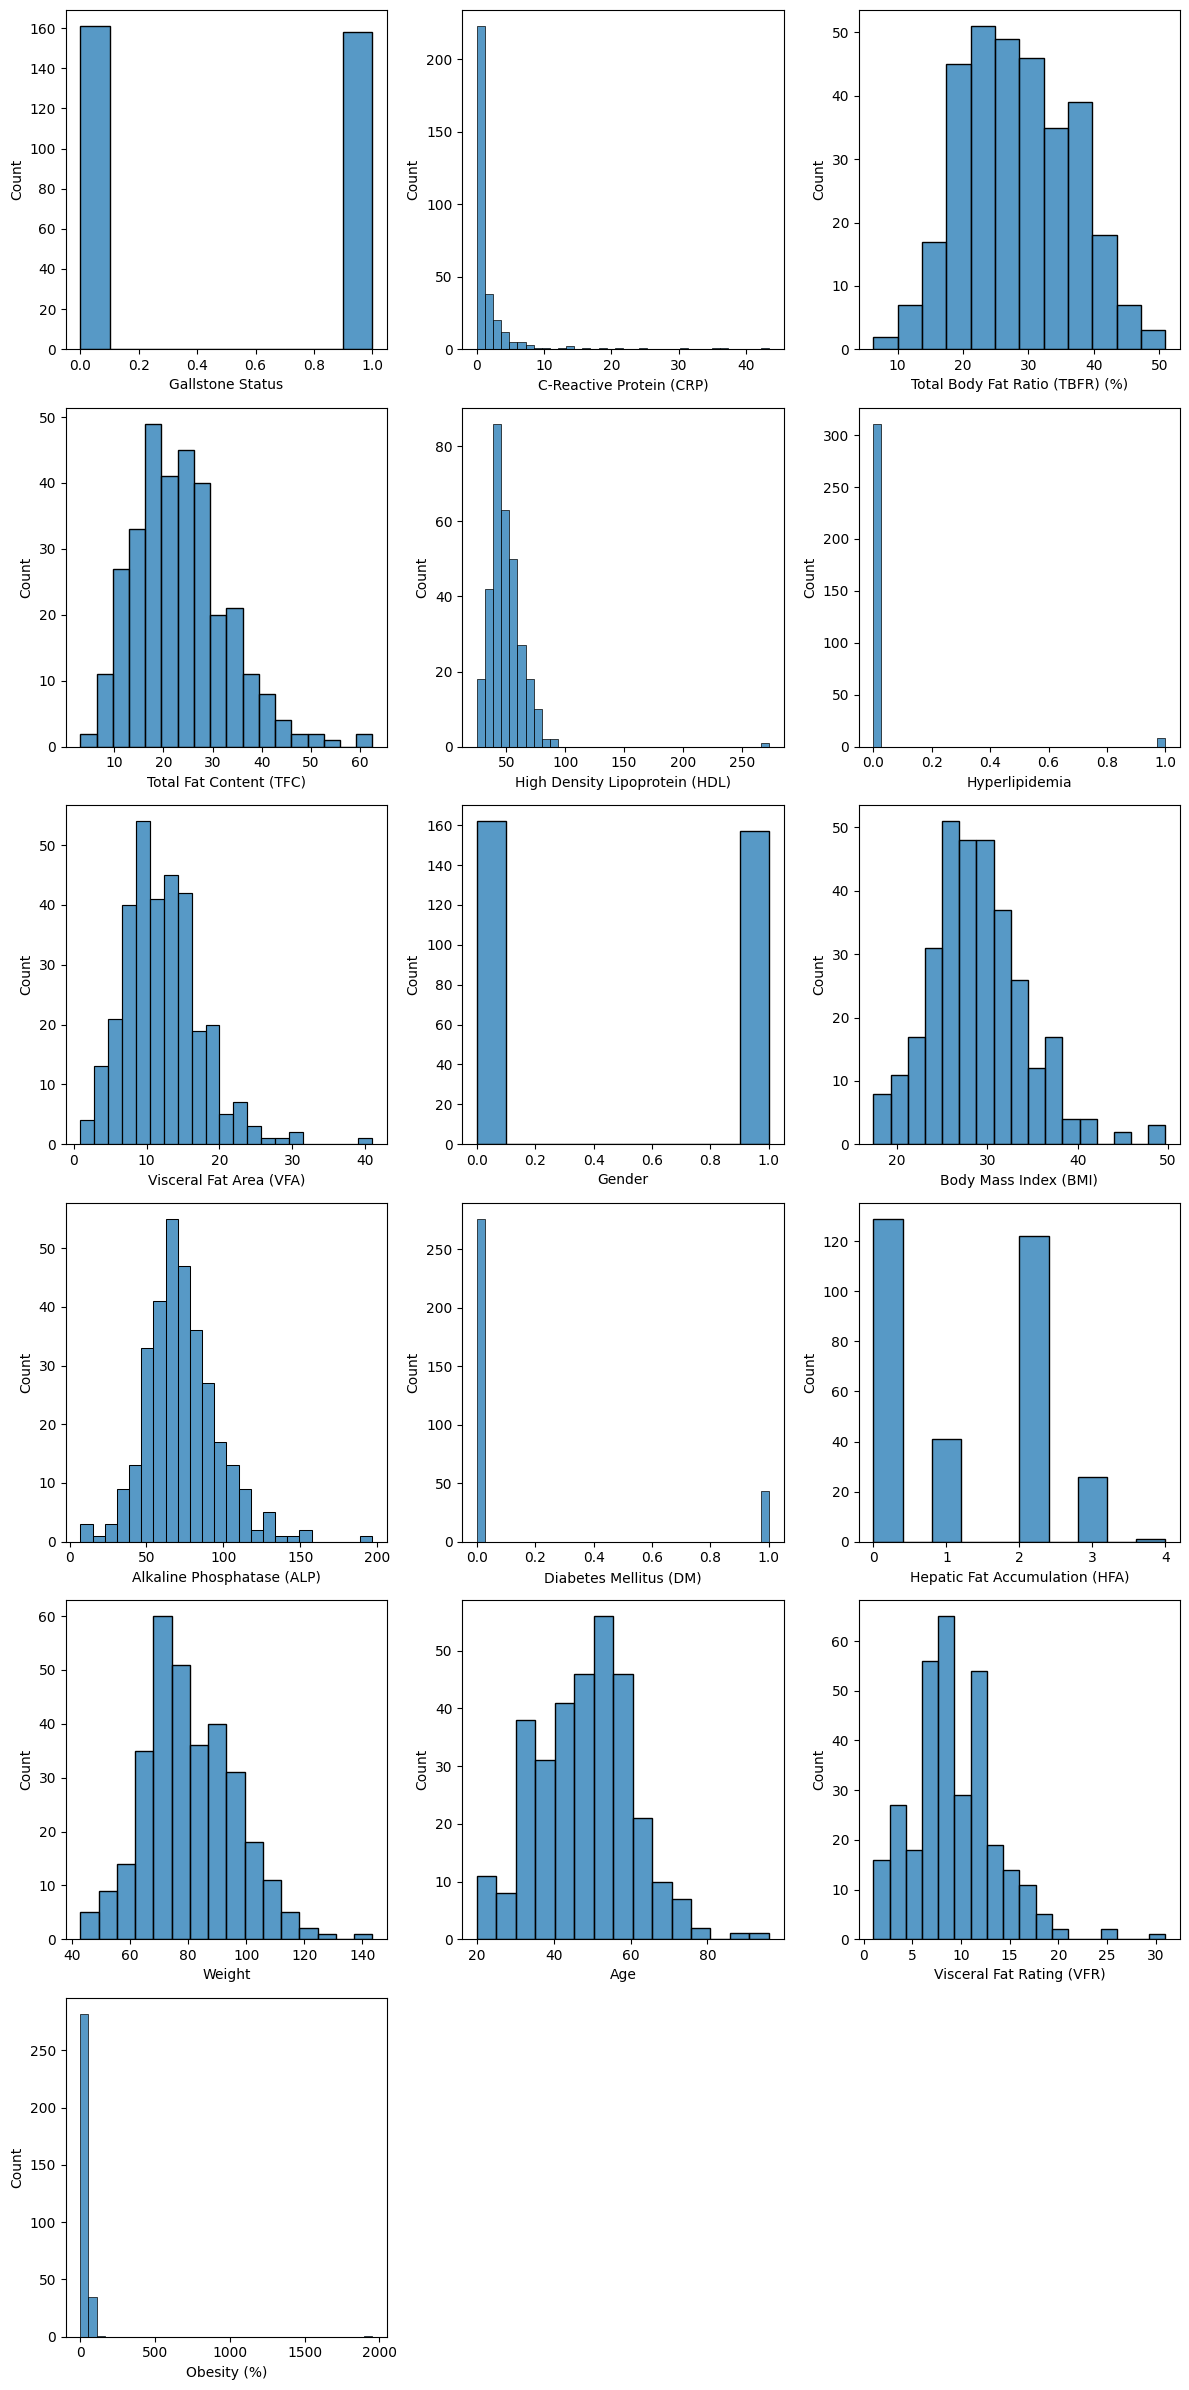

In [270]:
n_cols = 3
n_rows = int(np.ceil(len(X_selected.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()

for ax, feature in zip(axes, X_selected.columns):
    sns.histplot(X_selected[feature], ax=ax)

# rimuove eventuali subplot vuoti in fondo
for ax in axes[len(X_selected.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

---

## Eliminazione di outlier

In [271]:
def check_outliers(df, column, value, op="<"):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(df[column], ax=axes[0])
    axes[0].set_title("Original")

    if op == "<":
        mask = df[column] < value
    elif op == ">":
        mask = df[column] > value
    else:
        raise ValueError("mode must be '<' or '>'")

    inliers = df.loc[mask, column]

    sns.histplot(inliers, ax=axes[1])
    axes[1].set_title(f"{column} {op} {value}")

    plt.tight_layout()
    plt.show()

    print(f"Samples before filter: {df.shape[0]}")
    print(f"Samples after filter: {inliers.shape[0]}")
    print(f"Outliers found: {df.shape[0] - inliers.shape[0]}")

    return df.shape[0] - inliers.shape[0]

In [272]:
total_outliers = 0

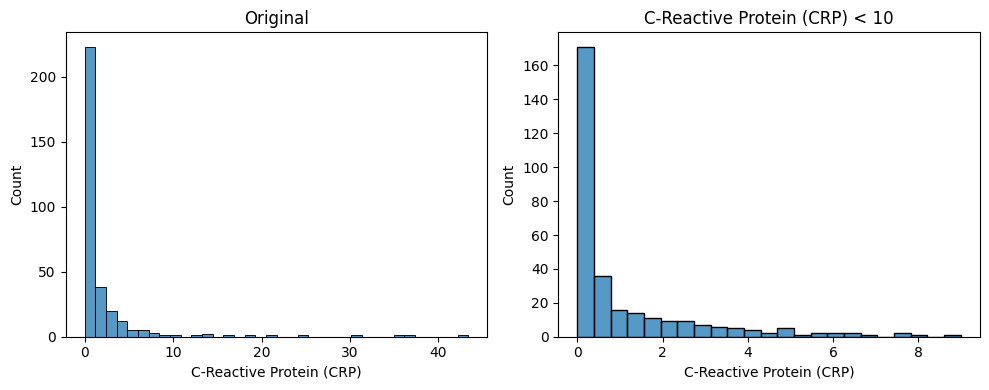

Samples before filter: 319
Samples after filter: 307
Outliers found: 12


In [273]:
#X["C-Reactive Protein (CRP)"]
column = "C-Reactive Protein (CRP)"
value = 10
op = "<" # < / >
outliers = check_outliers(X_filtered, column, value, op)
total_outliers += outliers
X_filtered = X_filtered[X_filtered[column] < value] # apply filter

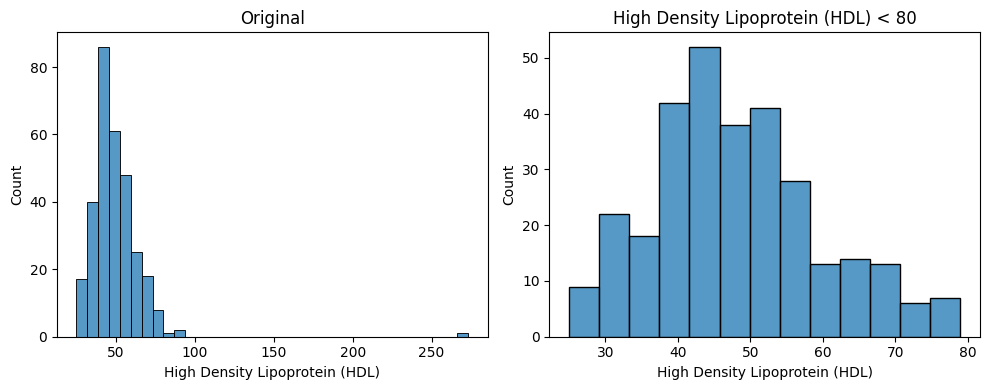

Samples before filter: 307
Samples after filter: 303
Outliers found: 4


In [274]:
#X["High Density Lipoprotein (HDL)"]
column = "High Density Lipoprotein (HDL)"
value = 80
op = "<" # < / >
outliers = check_outliers(X_filtered, column, value, op)
total_outliers += outliers
X_filtered = X_filtered[X_filtered[column] < value] # apply filter

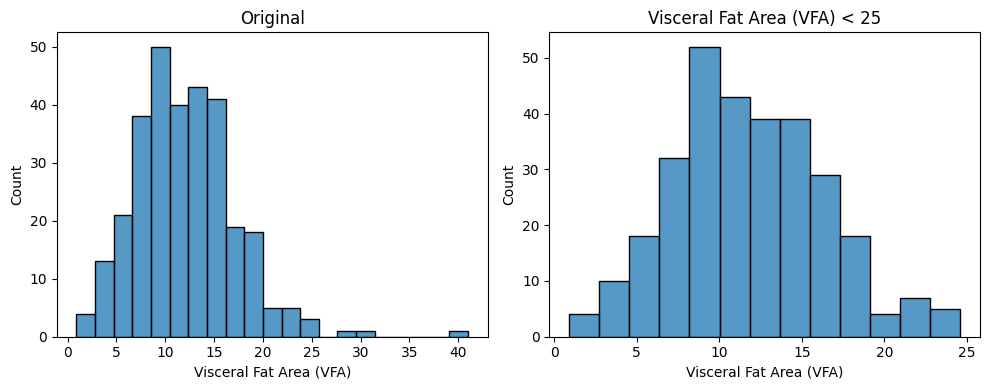

Samples before filter: 303
Samples after filter: 300
Outliers found: 3


In [275]:
#X["Visceral Fat Area (VFA)"]
column = "Visceral Fat Area (VFA)"
value = 25
op = "<" # < / >
outliers = check_outliers(X_filtered, column, value, op)
total_outliers += outliers
X_filtered = X_filtered[X_filtered[column] < value] # apply filter

In [276]:
print(f"Outliers found: {total_outliers}")
print(f"Original shape: {X_selected.shape}")
print(f"Filtered shape: {X_filtered.shape}")

Outliers found: 19
Original shape: (319, 16)
Filtered shape: (300, 16)


---

## Principal Component Analysis

**2.3 Eseguire una PCA delle variabili da L in poi, usando le versioni trasformate più regolari per quelle che si sono modificate al punto precedente. Quante componenti conviene tenere?**

In [277]:
from sklearn.decomposition import PCA

In [278]:
X = X_filtered.drop(columns=["Gallstone Status"])
y = X_filtered["Gallstone Status"]
print(X.shape)
print(y.shape)

(300, 15)
(300,)


In [279]:
X = X - X.mean()

In [280]:
pca = PCA()
pca.fit(X)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

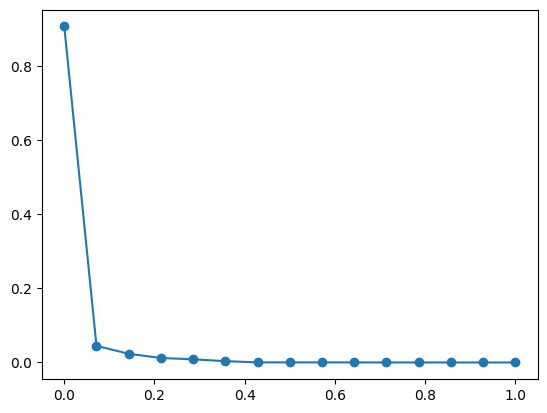

In [281]:
evr_x = np.linspace(0,1, X.shape[1])
evr_y = pca.explained_variance_ratio_

plt.plot(evr_x,evr_y)
plt.scatter(evr_x, evr_y)
plt.show()

In [282]:
thr = 0.95
summ = 0
n_components = 0

for v_ratio in pca.explained_variance_ratio_:
    summ += v_ratio
    n_components += 1

    if summ >= thr: break

print(summ)
print(n_components)

0.9512950039186561
2


## Logistic Regression

**2.4 Si usino le componenti ridotte, ottenute con la PCA, per prevedere la variabile di output, Gallstone Status. È richiesto di usare qualche tecnica di validazione per stimare l'accuratezza del metodo.**

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [285]:
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [286]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, ddof=1, axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [287]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [288]:
predictions = model.predict(X_test)

In [289]:
acc = accuracy_score(predictions, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.6


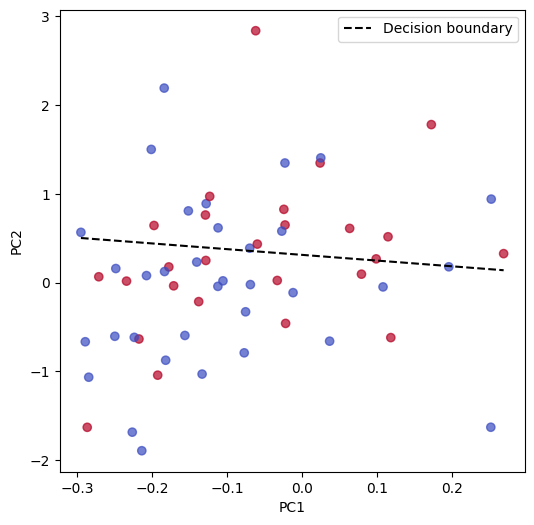

In [290]:
plt.figure(figsize=(6,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")

# retta di decisione
w1, w2 = model.coef_[0]
b = model.intercept_[0]

x_vals = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 200)
y_vals = -(w1 * x_vals + b) / w2

plt.plot(x_vals, y_vals, 'k--', label="Decision boundary")
plt.legend()
plt.show()
